# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

matplotlib를 이용해 여러 설정들 가능

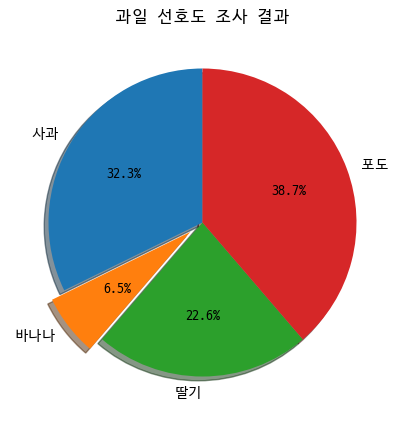

In [11]:
values = pd.Series([100,20,70,120], index=['사과','바나나','딸기','포도'])
values.plot(kind='pie',             # kind = 그래프 종류
            figsize=(5,5),          # figsize = 그래프 크기
            autopct='%1.1f%%',      # plt.pie()의 인자들을 전달
            startangle=90,
            # counterclock=False,
            shadow=True,
            explode=(0,0.1,0,0))
plt.title('과일 선호도 조사 결과')
plt.show()

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

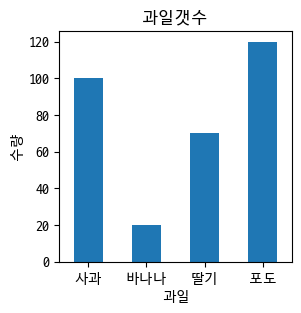

In [15]:
values.plot.bar(                    # .plot plt의 함수를 연결해주는 accessor 
                                    # .plot.bar() => values의 값을 이용해 plt.bar()를 실행
                title='과일갯수',
                figsize=(3,3),
                xlabel='과일',
                ylabel='수량',
                rot=0,              # rot = x축 라벨의 회전 각도
                )   
plt.show()

In [17]:
tips = pd.read_csv(r'./data/tips.csv')

In [19]:
result = tips['day'].value_counts()

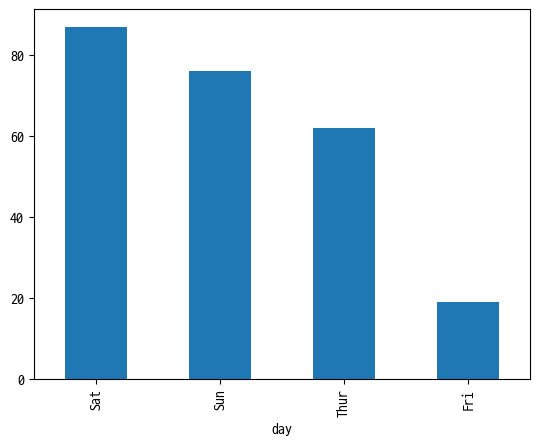

In [22]:
result.plot(kind='bar');

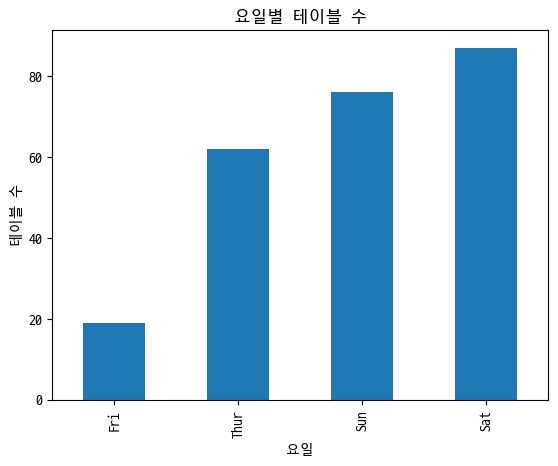

In [24]:
result.sort_values().plot(kind='bar',
                        title='요일별 테이블 수',
                        xlabel='요일',
                        ylabel='테이블 수',
                        );

<Axes: title={'center': '흡연 여부별 테이블 수'}, ylabel='smoker'>

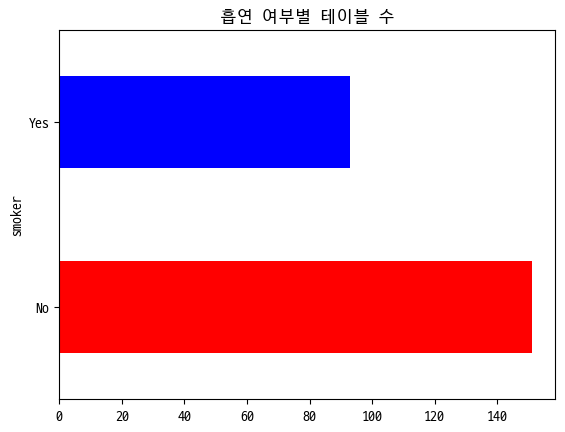

In [28]:
# 흡연 여부별 테이블수
tips['smoker'].value_counts().plot(kind='barh',
                                    title='흡연 여부별 테이블 수',
                                    color=['red', 'blue'],
                                    )

<Axes: title={'center': '흡연여부 + 성별 테이블 수'}, xlabel='smoker'>

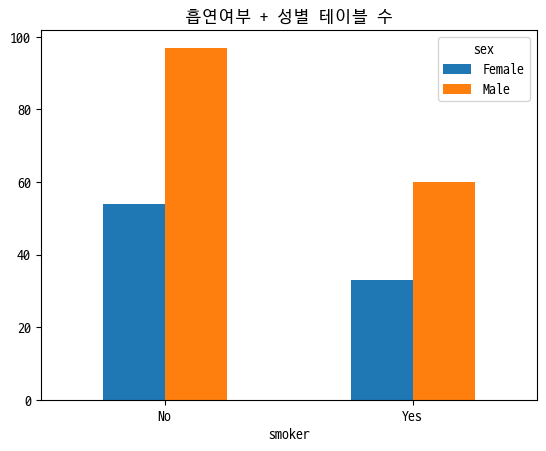

In [30]:
# 흡연여부 + 성별 테이블 수
agg_df = tips.pivot_table(index='smoker', columns='sex', values='tip', aggfunc='count')
agg_df.plot(kind='bar', rot=0, title='흡연여부 + 성별 테이블 수')

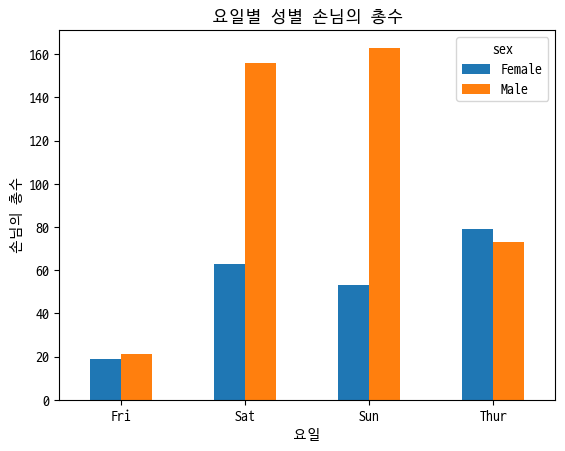

In [34]:
# 요일별 성별 손님의 총수 (size의 sum)
sum_df = tips.pivot_table(index='day', columns='sex', values='size', aggfunc='sum')
sum_df.plot(kind='bar',
            rot=0,
            title='요일별 성별 손님의 총수',
            xlabel='요일',
            ylabel='손님의 총수',
            );

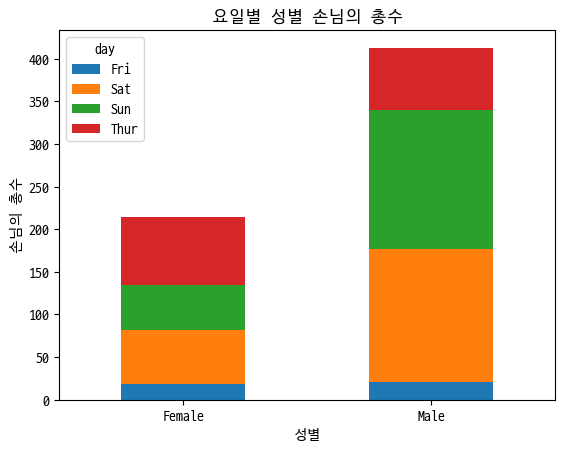

In [36]:
# 요일별 성별 손님의 총수 (size의 sum)
sum_df = tips.pivot_table(index='sex', columns='day', values='size', aggfunc='sum')
sum_df.plot(kind='bar',
            rot=0,
            title='요일별 성별 손님의 총수',
            xlabel='성별',
            ylabel='손님의 총수',
            stacked=True,    # 쌓아서 표현
            );

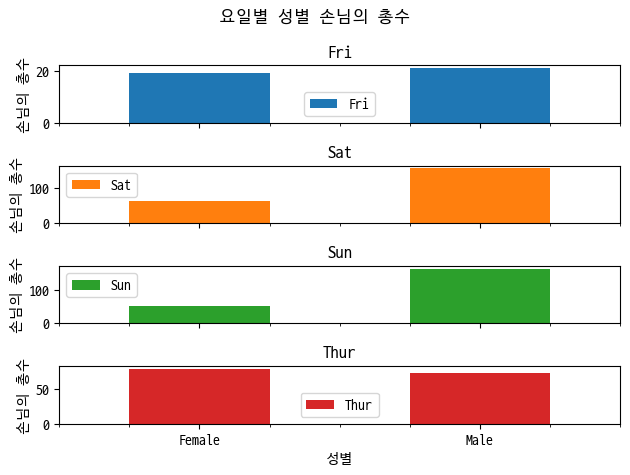

In [38]:
# 요일별 성별 손님의 총수 (size의 sum)
sum_df = tips.pivot_table(index='sex', columns='day', values='size', aggfunc='sum')
sum_df.plot(kind='bar',
            rot=0,
            title='요일별 성별 손님의 총수',
            xlabel='성별',
            ylabel='손님의 총수',
            subplots=True,    # 각각의 그래프로 표현
            );
plt.tight_layout()
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


## 파이차트

## 히스토그램, KDE(밀도그래프)

## Boxplot (상자그래프)

## scatter plot (산점도) 